# **ANALYSIS OF PALM OIL FFB YIELD**
Analysis of palm oil FFB yield based on various factors like weather condtions and invested manpower can be a crucial task for palm oil tree planters to understand the production patterns and also for preplanning of the inventory management and thus making optimal expense plans.
Understanding the relation and impact of various predictors like humidity, temperature and soil moisture can help forecasting the amount produced and thus assist the bussiness owners to make the right buy/sell decisions.  


In the current work, an analysis is conducted to analyze the impact of the predictors Soil Moisture, temperature scales, precipitation, working days of a month and area in hectres of the plantation to predict the fresh fruit bunch (FFB) yield where the data is divided monthly from the year 2008 to 2018. The use of multiple variables along the time to predict the FFB yield makes this a Multivariate Time Series problem.

In the following sections, a statistical analysis is performed to derieve the relation of the predictor variables combined with the date to understand their combined impact on the FFB yield

## The Data

### Importing the Dataset

In [0]:
#All that we need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sb
import datetime

In [2]:
#Setting the pandas display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
#Importing the data from the mounted google drive
df = pd.read_csv('/content/drive/My Drive/PanAsia_PalmOilFFB/palm_ffb.csv')
#Previewing the data
display(df.head())


,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


## What questions can the data answer?


1.   Does the FFB_Yield depend on the date? (Is this is a time series data at all?)
2.   Is there is a relation between the FFB_Yield and the rest of the predictors?
3. Are the other predictors also dependent on the Date?
4. Are there any correlations between the predictors?
4. Can the FFB_Yield be maximised by changing any of the predictor variables?
5. What is the forecasteed value of FFB_Yield for the date 1.1.2019?

## Looking at the Data

In [4]:
#Previewing the data
display("Sample Data")
display(df.head())
print(" ")
# Dimensions : number of rows, number of columns
display("Shape of the data")
display(df.shape)
print(" ")
# Data types of the data
display("Data Types of the variables")
display(df.dtypes)
print(" ")
# Check if there are any null present
display("Are there any nulls in the dataset")
display(df.isnull().any())
print(" ")
#Descriptive stats
display("Basic descriptive statistics")
display(df.describe(percentiles=[0.25, 0.5, 0.75, 0.99]))


'Sample Data'

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


'Shape of the data'

(130, 9)

'Data Types of the variables'

Date              object
SoilMoisture     float64
Average_Temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Working_days       int64
HA_Harvested     float64
FFB_Yield        float64
dtype: object

'Are there any nulls in the dataset'

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

'Basic descriptive statistics'

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
99%,634.755000,28.261194,22.500000,35.842000,408.412000,27.000000,868575.623797,2.239700
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


### Statistical Models :
1. Linear Modelling with all the available predictors except Time series data.
2. Univariate TIme Series Modelling. ARIMA
3. Multivariate Time Series Modelling.
4. Facebook's Prophet

### Machine Learning Models:
1. Ignoring time series, the models that can be used is SVM, Random Forest Regression, ANN etc.
2. RNN is a very popular time series neural network model

## Time Series Analysis of FFB Yield


### Plot the Data

Consider the FFB Yield as a Time Series. The produce of the FFB Yield plotted against time from the year 2008 until 2018 is as following.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


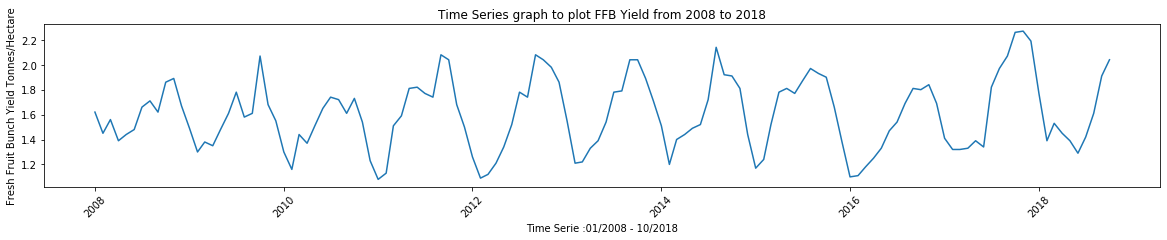

In [5]:
plt.rcParams['figure.figsize'] = (20,3)
date_yld_df = df.iloc[:,[0,8]]
date_yld_df['Date'] = pd.to_datetime(date_yld_df['Date'], dayfirst= True)
date_yld_df.set_index('Date', inplace=True)
fig,ax = plt.subplots(1,1)
ax.plot(date_yld_df['FFB_Yield'])
ax.set_title("Time Series graph to plot FFB Yield from 2008 to 2018")
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("Time Serie :01/2008 - 10/2018")
ax.set_ylabel("Fresh Fruit Bunch Yield Tonnes/Hectare")
plt.show()
plt.close()

From the time series plot we can observe a seasonality in the produce of palm oil fresh fruit bunch. On every annual cycle, the yield seems to peak the 3rd quarter with an increasing trend in 1 and 2 quarters and a decreasing trend in the 4th quarter. However, there is no visible overall increasing or decreasing trend over the years. The variance of the yield seemed to increase from the year 2011 and remained reasonably constant until the end of the series.

## Dicky-Fuller Test to confirm is the data is stationary
TIme Series analysis often are performed with an assumption that the time series are stationary. This is because the forecast in time series are assumed to be calculatd from previous data. Hence it is important to test the time series data for stationarity.

*   Null Hypothese H_0 : The data is not stationary
*   Alternate H_1 : The data is stationary



In [0]:
from statsmodels.tsa.stattools import adfuller
def stationaryTest(df, ts):
  rollingMean = df[ts].rolling(window = 12, center = False).mean()
  rollingStd = df[ts].rolling(window = 12, center = False).std()

  #Rolling statistics plotted
  originalPlt = plt.plot(df[ts], color='blue', label='Original')
  meanPlt = plt.plot(rollingMean, color='red', label='Rolling Mean')
  stdPlt = plt.plot(rollingStd, color='black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title("Rollin Mean and Standard Deviation for %s"%(ts))
  plt.xticks(rotation=45)
  plt.show(block=False)
  plt.close()
  #Dicky Fuller test
  dftest = adfuller(df[ts], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value','No of Lags Used', 'No of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value %s'%key] = value
  print(dfoutput)

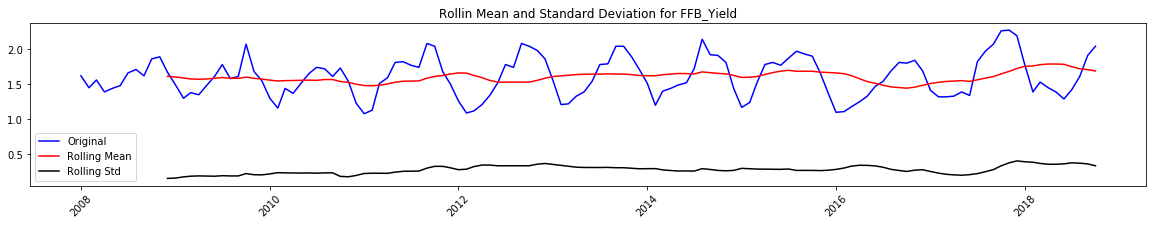

Test Statistics             -2.908189
p-value                      0.044404
No of Lags Used             12.000000
No of Observations Used    117.000000
Critical Value 1%           -3.487517
Critical Value 5%           -2.886578
Critical Value 10%          -2.580124
dtype: float64


In [0]:
stationaryTest(date_yld_df, 'FFB_Yield')

Looking at the p-value which is 4%, considering the test is condicted at a 95% confidence interval, we can reject the Null Hypothesis H_0. Hence we can conclude the FFB Yield over the time had remained stationary. Or the Stationarity of the time series data is supported with the test.

### ACF and PACF

In [0]:
import statsmodels.graphics.tsaplots as tsplt
import seaborn as sns

In [0]:
def plotAcfPacf(y, title, lags = None, figSize = (12,8)):
  fig = plt.figure(figsize=figSize)
  layout = (2,2)
  ts_axes = plt.subplot2grid(layout, (0,0))
  hist_axes = plt.subplot2grid(layout, (0,1))
  acf_axes = plt.subplot2grid(layout, (1,0))
  pacf_axes = plt.subplot2grid(layout, (1,1))

  y.plot(ax=ts_axes)
  ts_axes.set_title(title, fontsize=14, fontweight='bold')
  y.plot(ax=hist_axes, kind='hist', bins=30)
  hist_axes.set_title('histogram')
  tsplt.plot_acf(y, lags=lags, ax= acf_axes)
  tsplt.plot_pacf(y, lags=lags, ax = pacf_axes)
  [ax.set_xlim(0) for ax in [acf_axes,pacf_axes]]
  sns.despine()
  plt.tight_layout()
  return ts_axes, acf_axes, pacf_axes



(<matplotlib.axes._subplots.AxesSubplot at 0x7f511c316ef0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f511c29ff28>)

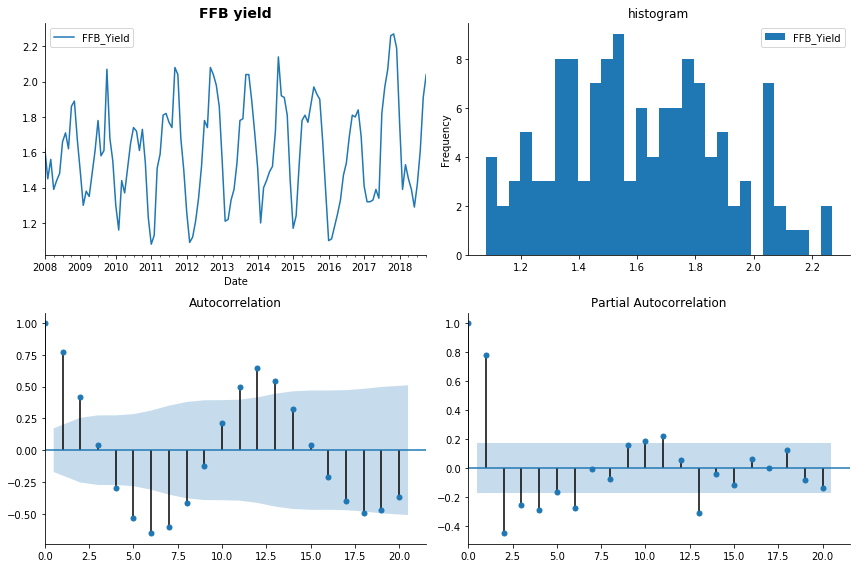

In [0]:
plotAcfPacf(date_yld_df, 'FFB yield', lags=20)

It is very clear from the ACF and the PACF plots that the data is seasonal with a seasonality of about 12 to 13, this best suits a SARIMA model. ARIMA is not considered since there is no trend in the time series and only seasonality is observed.


From the above plots it can be unserstood that,
### Trand Parameters


*   p=0
*   d=0
*   q=0

### Seasonal Parameters



*   P=1
*   D=1
*   Q=0
 
With a Seasonality = 12

Hence the Model we can fit is ARIMA(0,0,0)(1,1,0)12

## Data Modelling using SARIMA

In [0]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(date_yld_df,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6952      0.068     10.204      0.000       0.562       0.829
ar.S.L12      -0.2627      0.106     -2.488      0.013      -0.470      -0.056
sigma2         0.0266      0.004      7.344      0.000       0.020       0.034


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


The p-values of all the coefficients are less than 5% and hence are significant. The fitted model can be visualized from the following diagnostics plot of the model.

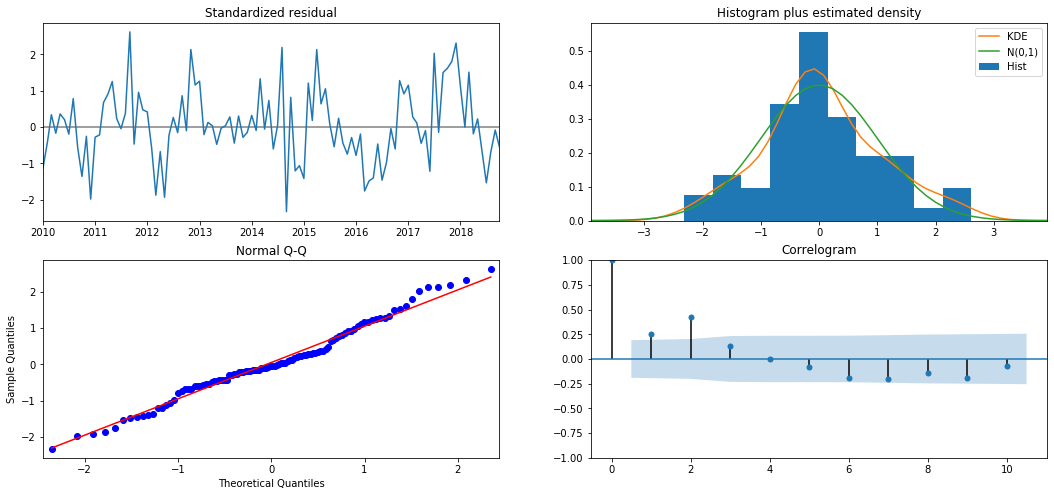

In [0]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

### Forecasting

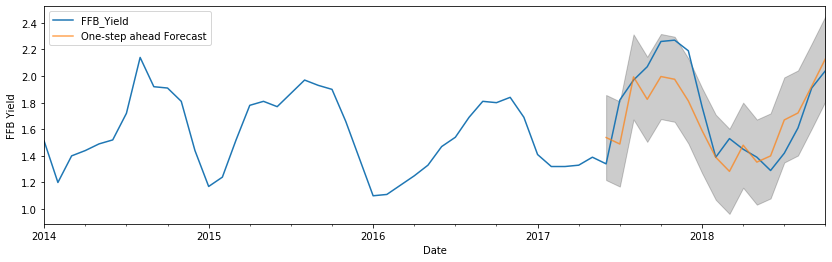

In [0]:
pred = results.get_prediction(start = pd.to_datetime('2017-06-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = date_yld_df['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('FFB Yield')
plt.legend()
plt.show()

There are various ways we can calculate the errors to validate the forecasting of the model like MSE, RMSE and MAE. The closer the values of the the errors to 0, the better the model can perform

In [0]:
y_forecasted = pred.predicted_mean
y_truth = date_yld_df['2017-06-01':]
y_forecasted = pd.DataFrame(y_forecasted)
y_forecasted = y_forecasted.reset_index()
y_forecasted = y_forecasted[0]
y_truth = y_truth.reset_index()
y_truth = y_truth.drop('Date',1)
err_df = pd.concat([y_forecasted,y_truth],axis=1)
err_df = err_df.rename(columns={0: "Forecast", "FFB_Yield": "Actual"})
err_df['sq_diff'] = (err_df['Forecast']-err_df['Actual'])**2 

In [0]:
mse = err_df['sq_diff'].mean()
import math
print("The Root Mean Square Error using the Time Series Forecast is",math.sqrt(mse))

The Root Mean Square Error using the Time Series Forecast is 0.2026273343571225


### RMSE = 0.2 (Time Series)

As seen from the above method, time series alone is a good predictor of the FFB Yield irrespective of the other predictors. In the following section we shall model the data to understand the relation of the remaining predictors with the FFB yield.

## Other factors effecting the FFB Yield 

The given dataset also contains other factors that would possibly influence the FFb Yield which are as follows.

1. Soil Moisture
2. Minimum Temperature
3. Maximum Temperature
4. Average Temperature
5. Precipitation
6. No of Working Daya in the month
7. Number of hectares used for Harvesting

Let us plot these variables against the FFB Yield to identify any possible relationship with the dependent variable.

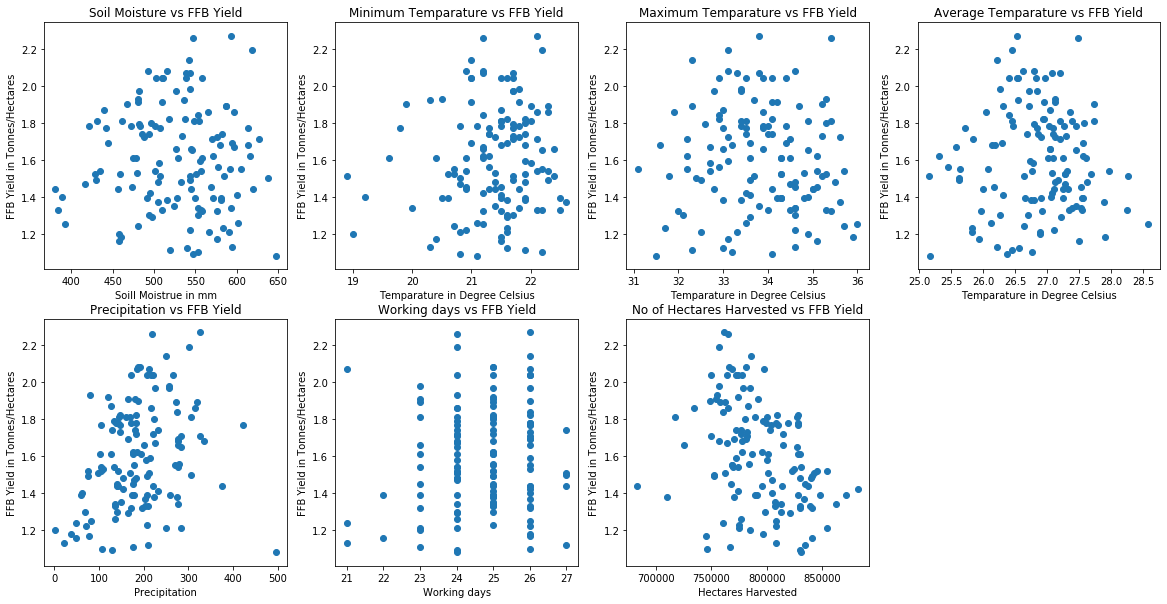

In [6]:
#Scatter Plot for Soil Moisture
plt.rcParams['figure.figsize'] = (20,10)
fig,a = plt.subplots(2,4)
a[0,0].scatter(df['SoilMoisture'], df['FFB_Yield'])
a[0,0].set_title('Soil Moisture vs FFB Yield')
a[0,0].set_xlabel('Soill Moistrue in mm')
a[0,0].set_ylabel('FFB Yield in Tonnes/Hectares')
#Scatter plot for Minimum Temperature
a[0,1].scatter(df['Min_Temp'], df['FFB_Yield'])
a[0,1].set_title('Minimum Temparature vs FFB Yield')
a[0,1].set_xlabel('Temparature in Degree Celsius')
a[0,1].set_ylabel('FFB Yield in Tonnes/Hectares')
#Scatter plot for Maximum teperature
a[0,2].scatter(df['Max_Temp'], df['FFB_Yield'])
a[0,2].set_title('Maximum Temparature vs FFB Yield')
a[0,2].set_xlabel('Temparature in Degree Celsius')
a[0,2].set_ylabel('FFB Yield in Tonnes/Hectares')
#Scatter plot for Average temperature
a[0,3].scatter(df['Average_Temp'], df['FFB_Yield'])
a[0,3].set_title('Average Temparature vs FFB Yield')
a[0,3].set_xlabel('Temparature in Degree Celsius')
a[0,3].set_ylabel('FFB Yield in Tonnes/Hectares')
#Scatter plot for precipitation
a[1,0].scatter(df['Precipitation'], df['FFB_Yield'])
a[1,0].set_title('Precipitation vs FFB Yield')
a[1,0].set_xlabel('Precipitation')
a[1,0].set_ylabel('FFB Yield in Tonnes/Hectares')
#Scatter plot for No of Working days in the month
a[1,1].scatter(df['Working_days'], df['FFB_Yield'])
a[1,1].set_title('Working days vs FFB Yield')
a[1,1].set_xlabel('Working days')
a[1,1].set_ylabel('FFB Yield in Tonnes/Hectares')
#Scatter plot for no of harvested lands in hectares
a[1,2].scatter(df['HA_Harvested'], df['FFB_Yield'])
a[1,2].set_title('No of Hectares Harvested vs FFB Yield')
a[1,2].set_xlabel('Hectares Harvested')
a[1,2].set_ylabel('FFB Yield in Tonnes/Hectares')

fig.delaxes(a[1,3])

The above scatter plots display the relation of the FFB yield with the rest of the predictors in the dataset. We can observe a linear relationship positive between the precipitation and the FFB yield. This can be tested by calculating the correlation and check the significance between the FFB Yeild and the Precipitation. Rest of the plots moslty look random but with observations from the plots like,
1.  The FFB Yield is the least when the Soil Moisture is almost 650 mm and the variance of FFB yield is high when the Soil Moisture is more than 450 mm.
2. Correlation of the temparature with the FFB Yield appears to be positiev with a very high variance, however, FFB Yield looks to drop in the higher scales of temparature.
3. From the working days plot, we can understand that there was maximum yield registered when the number of days was 26. The distribution of the working days lookks highly dense with the days 24, 25 and 26.
4. There seems to be a negative correlation between the number of hecteres harvested with the yield.(Note: Correlation does not mean causation)


### Data Preprocessing

The dataset has no missing values and the presence is of outliers is also very unlikely to consider from the scatter plots observed previously. However, since we understood the effect of seasonality on the produce of the FFB yield, the 'Date' column is droppped from the dataset to be able to understand the influencne of other factors on the FFB Yield.

In [11]:
#Drop the Date column from the dataset since this is hingly influencing the FFB Yield, we need to examing the influence of the 
df = df.drop('Date', axis=1)


,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


Determining the correlations between the predictors in the dataset is useful to eliminate predictors according to the assumptions of linear regression. The correlations between the columns can be viewed from the below table

In [12]:
#dividing into independent and dependent variables
df_X = df.iloc[:,0:7]
df_y = df.iloc[:,-1]
display(df_X.head())
display(df_y.head())

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222


0    1.62
1    1.45
2    1.56
3    1.39
4    1.44
Name: FFB_Yield, dtype: float64

### Correlation Matrix

In [14]:
display(df_X.corr(method='pearson'))

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000


Calculating the Pearsons Correlation between the columns in the dataset, it is observed that there is a strong correlation between the 'Max_Temp' and 'Average_Temp'. The column to be eliminated can be chosen by calculating the Variance Inflation Factor for the 2 variables and deleting the one which is high.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_X)
print(pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns))

const            4796.616824
SoilMoisture        2.210236
Average_Temp        4.317216
Min_Temp            1.458334
Max_Temp            3.033652
Precipitation       1.887093
Working_days        1.058659
HA_Harvested        1.279879
dtype: float64


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


From the above observation, 'Average_Temp' has the highest VIF val compared to Max_Temp and hence will be dropped from the dataframe

In [16]:
df_X = df_X.drop('Average_Temp', axis=1)
display(df_X.head())

,SoilMoisture,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
0,616.4,21.3,32.2,184.4,25,777778.3951
1,568.9,20.9,35.1,140.2,23,767988.2759
2,577.6,21.3,32.9,280.4,25,783951.9231
3,581.1,20.6,34.8,173.3,25,788987.0504
4,545.4,20.9,35.0,140.6,25,813659.7222


In [17]:
#Calculate the correlation after removing the Avg Temp
df_X.corr(method='pearson')

,SoilMoisture,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
SoilMoisture,1.000000,0.015839,-0.499936,0.552001,-0.057015,-0.326539
Min_Temp,0.015839,1.000000,-0.124754,0.345944,0.068414,0.024396
Max_Temp,-0.499936,-0.124754,1.000000,-0.461117,-0.039112,0.314827
Precipitation,0.552001,0.345944,-0.461117,1.000000,0.127897,-0.265866
Working_days,-0.057015,0.068414,-0.039112,0.127897,1.000000,0.048876
HA_Harvested,-0.326539,0.024396,0.314827,-0.265866,0.048876,1.000000


The remaining correlations are not strong enough and hence we can consider keeping the rest of the predictors.

In [0]:
#Backup copy with feature names for later reference
df_X_fets = df_X
#Matrix of input features
df_X = df_X.values

### Scaling the input variables using the Standard Scaler

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_X = scaler.fit_transform(df_X)

### Splitting the Dataset

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=5)

### Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print("R-Squared explained by the Linear Regression Model:",regressor.score(X_train,y_train))

R-Squared explained by the Linear Regression Model: 0.21511473898782207


In [38]:
y_pred = regressor.predict(X_test)
y_pred = np.around(y_pred,2)
print('Predicted >',y_pred)
print('Actual    >',y_test)
comp = {'Actual':y_test, 'Predicted':y_pred}
comp_df = pd.DataFrame(data=comp)
comp_df.reset_index()
display(comp_df.head())

Predicted > [1.59 1.47 1.46 1.46 1.69 1.46 1.53 1.57 1.53 1.61 1.59 1.75 1.73 1.25
 1.52 1.75 1.64 1.63 1.33 1.55 1.45 1.59 1.36 1.43 1.54 1.63]
Actual    > [1.78 1.12 1.77 1.34 1.91 1.82 1.39 2.07 1.23 1.41 1.55 1.89 1.89 1.13
 1.77 1.77 2.04 2.08 1.42 1.33 1.61 1.61 1.16 1.51 1.66 1.97]


,Actual,Predicted
0,1.78,1.59
1,1.12,1.47
2,1.77,1.46
3,1.34,1.46
4,1.91,1.69


In [0]:
#Plot the predicted vs actual
def plotPredvsAct(comp_df, title):
  plt.plot(comp_df['Predicted'], color = 'red', label = 'Predicted')
  plt.plot(comp_df['Actual'], color = 'blue', label = 'Actual')
  plt.legend(loc='best')
  plt.title(title)
  plt.ylabel('FFB Yield Tonnes/Hectare')
  plt.show()
  plt.close()

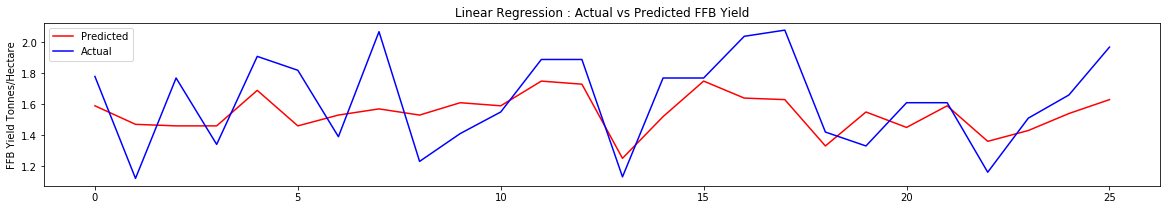

In [72]:
plotPredvsAct(comp_df=comp_df,title='Linear Regression : Actual vs Predicted FFB Yield')

In [49]:
#Calculating the Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
print("The RMSE for the predictions using Linear Model:",rms)

The RMSE for the predictions using Linear Model: 0.24746406110476232


### RMSE = 0.24 (Linear Regression Model)

It is observed that the R-Squared explained by the Linear Model is only 52% with a RMSE of 0.25. This can be consisered a weak model in predicting the FFB Yield.

In [59]:
print('R-Squared explained by the Model:',regressor.score(X_train, y_train))
print('Intercept of the Model:',regressor.intercept_)
coef_df_lm = {'Variable':df_X_fets.columns.values, 'coef':regressor.coef_}
coef_df_lm = pd.DataFrame(data=coef_df_lm)
display(coef_df_lm)

R-Squared explained by the Model: 0.21511473898782207
Intercept of the Model: 1.5858968913475042


,Variable,coef
0,SoilMoisture,-0.062769
1,Min_Temp,-0.003876
2,Max_Temp,0.035203
3,Precipitation,0.107895
4,Working_days,0.007648
5,HA_Harvested,-0.095753


### Model Interpretation



*   When all the variables are 0, the FFB Yield per month is 1.58 Tonnes/Hectare.
*   For every unit increase in Soil moisture, the FFB yield reduces by 0.06 tonnes per hectare provided rest of the predictors are constant.
*   For every unit increase in Minimum temperature, the FFB yield reduces by 0.003 tonnes per hectare provided rest of the predictors are constant.
*   For every unit increase in Maximum temparature, the FFB yield increases by 0.03 tonnes per hectare provided the rest of the predictors are contant.
*   For every unit increase in precipitation, the FFB yield increases by 0.01 tonnes per hectare provided rest of the predictors are constant.
*   For every unit increase in working days, the FFB yield increases by 0.007 tonnes per hectare provided rest of the predictors are constant.
*   For every unit increase in Harvested land, the FFB yield reduces by 0.09 tonnes per hectare provided rest of the predictors are constant.

However, the above statement are only statistical interpretations of the model. In practical, The statement in regards with the variables HA_Harvested would not stand true.

### Model Equation

FFB_Yield = 1.58 - 0.06(Soil Moisture) - 0.03(Minumum Temperature) + 0.03(Maximum Temperature) + 0.01(Precipitation) + 0.007(Working days) - 0.09(Hectares Harvested)

The model is weak because the data is not linearly related to the predicted variable FFB yield. The model accuracies can be improved by fitting non linear regression models to the dataset.

### Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfRegressor = RandomForestRegressor(n_estimators=100, random_state=0)
rfRegressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [61]:
rfRegressor.score(X_train,y_train)

0.9026141600728627

In [0]:
y_pred_rf = rfRegressor.predict(X_test)

In [64]:
y_pred_rf = np.around(y_pred_rf, 2)
print(y_pred_rf)

[1.46 1.5  1.48 1.36 1.89 1.58 1.57 1.64 1.57 1.69 1.66 2.03 1.58 1.32
 1.65 1.46 1.71 1.82 1.49 1.49 1.53 1.71 1.43 1.4  1.58 1.72]


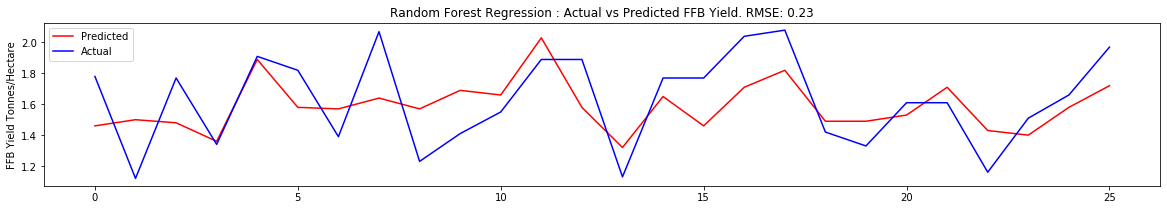

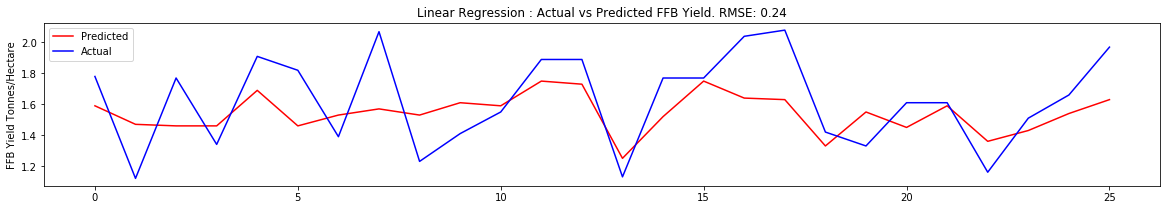

In [74]:
rf_comp_df = {'Actual':y_test, 'Predicted':y_pred_rf}
rf_comp_df = pd.DataFrame(data=rf_comp_df)
rf_comp_df.reset_index()

plotPredvsAct(comp_df=rf_comp_df, title='Random Forest Regression : Actual vs Predicted FFB Yield. RMSE: 0.23')
plotPredvsAct(comp_df=comp_df, title='Linear Regression : Actual vs Predicted FFB Yield. RMSE: 0.24')

In [68]:
rms_rf = sqrt(mean_squared_error(y_test, y_pred_rf))
print("The RMSE for the predictions using Random Forest Regression Model:",rms_rf)

The RMSE for the predictions using Random Forest Regression Model: 0.2363423201792102


Text(0, 0.5, 'Importance')

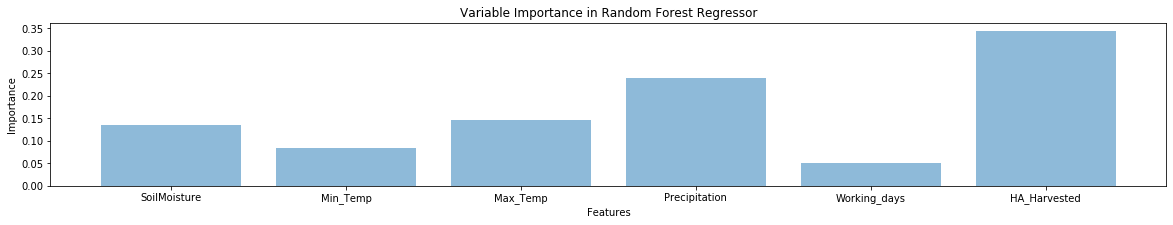

In [69]:
features = df_X_fets.columns.values
feature_imp = rfRegressor.feature_importances_
dat = {'features':features, 'imp_rf':feature_imp}
fet_imp = pd.DataFrame(data=dat)
plt.bar(fet_imp['features'], fet_imp['imp_rf'], align='center', alpha = 0.5)
plt.title('Variable Importance in Random Forest Regressor')
plt.xlabel('Features')
plt.ylabel('Importance')

### RMSE = 0.23 (Random Forest Regression)

### Discussion

The most potential predictor for forecating the FFB Yield of the Palm Oil trees fromt he given dataset was evidently the 'Time' itself. However, excluding the 'Time' and understanding the rest of the predictors, the best features determined using Random Forest Regression model are in the order of highest priority as below,

1. HA_Harvested
2. Precipitation
3. Maximum Temperature
4. Soil Moisture
5. Minium Temperature
6. Working Days

Weather parameter based forecasting of the fresh fruit bunch yield could include a large variety of the variables that include Water Stress in the environment due to the effect of the rainfalls result in high relative humidity in the air. Certain researchers also tried linerly modelling the number of hours of sun shine with the fresh fruit bunch yield where the sunsshine hours are a monthly aggregate.

Chemical composition of the soil and the fertilizers used can be instrumental variables in predicting the ffb yield. There are numerous researchers studying the impact of fertilizer composition on the FFB yield. There are also numerous researchers that study and suggest the flowreing of the palm tree is linearly related to the yield as well. Flowering is impacted by the weather conditions and user manures or fertilizers inturn. Furthur controlling variables like wind speeds, presence of butterflies, bees etc to pollinate the tree naturally, labour involving manual pollination can also be instrumental predictors of the yield.

Potential Predictors outside the dataset can be,
1. Humidity
2. Sun shine hours
3. Wind Speeds
4. Fertilizer quantity and composition
5. Pollination details

If proposed to add more variables in the dataset to predict the yield, the above mentionend variables are a good choice of data to find the FFB yield for palm oil trees.